In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e8/sample_submission.csv
/kaggle/input/playground-series-s4e8/train.csv
/kaggle/input/playground-series-s4e8/test.csv


# imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 200)
plt.style.use('ggplot')

In [3]:

train = pd.read_csv('/kaggle/input/playground-series-s4e8/train.csv')
test = pd.read_csv('/kaggle/input/playground-series-s4e8/test.csv')

In [4]:
train

,id,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,0,e,8.80,f,s,u,f,a,c,w,4.51,15.39,NaN,NaN,w,NaN,NaN,f,f,NaN,d,a
1,1,p,4.51,x,h,o,f,a,c,n,4.79,6.48,NaN,y,o,NaN,NaN,t,z,NaN,d,w
2,2,e,6.94,f,s,b,f,x,c,w,6.85,9.93,NaN,s,n,NaN,NaN,f,f,NaN,l,w
3,3,e,3.88,f,y,g,f,s,NaN,g,4.16,6.53,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
4,4,e,5.85,x,l,w,f,d,NaN,w,3.37,8.36,NaN,NaN,w,NaN,NaN,f,f,NaN,g,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3116940,3116940,e,9.29,f,NaN,n,t,NaN,NaN,w,12.14,18.81,b,NaN,w,u,w,t,g,NaN,d,u
3116941,3116941,e,10.88,s,NaN,w,t,d,c,p,6.65,26.97,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
3116942,3116942,p,7.82,x,e,e,f,a,NaN,w,9.51,11.06,NaN,NaN,y,NaN,w,t,z,NaN,d,a
3116943,3116943,e,9.45,p,i,n,t,e,NaN,p,9.13,17.77,NaN,y,w,NaN,NaN,t,p,NaN,d,u


In [5]:
test

,id,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,3116945,8.64,x,NaN,n,t,NaN,NaN,w,11.13,17.12,b,NaN,w,u,w,t,g,NaN,d,a
1,3116946,6.90,o,t,o,f,NaN,c,y,1.27,10.75,NaN,NaN,n,NaN,NaN,f,f,NaN,d,a
2,3116947,2.00,b,g,n,f,NaN,c,n,6.18,3.14,NaN,NaN,n,NaN,NaN,f,f,NaN,d,s
3,3116948,3.47,x,t,n,f,s,c,n,4.98,8.51,NaN,NaN,w,NaN,n,t,z,NaN,d,u
4,3116949,6.17,x,h,y,f,p,NaN,y,6.73,13.70,NaN,NaN,y,NaN,y,t,NaN,NaN,d,u
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2077959,5194904,0.88,x,g,w,f,a,d,w,2.67,1.35,NaN,NaN,e,NaN,NaN,f,f,NaN,d,u
2077960,5194905,3.12,x,s,w,f,d,c,w,2.69,7.38,NaN,NaN,w,NaN,NaN,f,f,NaN,g,a
2077961,5194906,5.73,x,e,e,f,a,NaN,w,6.16,9.74,NaN,NaN,y,NaN,w,t,z,NaN,d,a
2077962,5194907,5.03,b,g,n,f,a,d,g,6.00,3.46,NaN,s,g,NaN,NaN,f,f,NaN,d,a


In [6]:
# set seed for reproducibility
#np.random.seed(0) 

# understanding the data

In [7]:
train.shape

(3116945, 22)

There are over 3 million rows of data with 22 columns

In [8]:
train.columns

Index(['id', 'class', 'cap-diameter', 'cap-shape', 'cap-surface', 'cap-color',
       'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color',
       'stem-height', 'stem-width', 'stem-root', 'stem-surface', 'stem-color',
       'veil-type', 'veil-color', 'has-ring', 'ring-type', 'spore-print-color',
       'habitat', 'season'],
      dtype='object')

In [9]:
train.dtypes

id                        int64
class                    object
cap-diameter            float64
cap-shape                object
cap-surface              object
cap-color                object
does-bruise-or-bleed     object
gill-attachment          object
gill-spacing             object
gill-color               object
stem-height             float64
stem-width              float64
stem-root                object
stem-surface             object
stem-color               object
veil-type                object
veil-color               object
has-ring                 object
ring-type                object
spore-print-color        object
habitat                  object
season                   object
dtype: object

## missing values

In [10]:
# get the number of missing data points per column
missing_values_count = train.isna().sum()
missing_values_count

id                            0
class                         0
cap-diameter                  4
cap-shape                    40
cap-surface              671023
cap-color                    12
does-bruise-or-bleed          8
gill-attachment          523936
gill-spacing            1258435
gill-color                   57
stem-height                   0
stem-width                    0
stem-root               2757023
stem-surface            1980861
stem-color                   38
veil-type               2957493
veil-color              2740947
has-ring                     24
ring-type                128880
spore-print-color       2849682
habitat                      45
season                        0
dtype: int64

In [11]:
# how many total missing values do we have?
total_cells = np.product(train.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
print(percent_missing)

23.141114719118182


# data preprocessing
## defining X and y

In [12]:
#Modification of target
train['class'] = train['class'].replace(['e', 'p'], [0, 1])
# Separate target from predictors
y = train['class']
X_train = train.drop(['class','id'], axis=1)
X_test = test.drop(['id'], axis=1)
# Select categorical columns names
categorical_cols_name = [cname for cname in X_train.columns if X_train[cname].dtype == "object"]
# Select numerical columns names
numerical_cols_name = [cname for cname in X_train.columns if X_train[cname].dtype in ['int64', 'float64']]

/tmp/ipykernel_23/445347547.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train['class'] = train['class'].replace(['e', 'p'], [0, 1])


In [13]:
y

0          0
1          1
2          0
3          0
4          0
          ..
3116940    0
3116941    0
3116942    1
3116943    0
3116944    1
Name: class, Length: 3116945, dtype: int64

In [14]:
print(numerical_cols_name)

['cap-diameter', 'stem-height', 'stem-width']


In [15]:
numerical_cols_train = X_train[numerical_cols_name].copy()
categorical_cols_train = X_train[categorical_cols_name].copy()

In [16]:
numerical_cols_test = X_test[numerical_cols_name].copy()
categorical_cols_test = X_test[categorical_cols_name].copy()

In [17]:
numerical_cols_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2077964 entries, 0 to 2077963
Data columns (total 3 columns):
 #   Column        Dtype  
---  ------        -----  
 0   cap-diameter  float64
 1   stem-height   float64
 2   stem-width    float64
dtypes: float64(3)
memory usage: 47.6 MB


In [18]:
categorical_cols_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2077964 entries, 0 to 2077963
Data columns (total 17 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   cap-shape             object
 1   cap-surface           object
 2   cap-color             object
 3   does-bruise-or-bleed  object
 4   gill-attachment       object
 5   gill-spacing          object
 6   gill-color            object
 7   stem-root             object
 8   stem-surface          object
 9   stem-color            object
 10  veil-type             object
 11  veil-color            object
 12  has-ring              object
 13  ring-type             object
 14  spore-print-color     object
 15  habitat               object
 16  season                object
dtypes: object(17)
memory usage: 269.5+ MB


In [19]:
# Count unique values
unique_values = numerical_cols_test.nunique()
print(unique_values)

cap-diameter    3745
stem-height     2664
stem-width      5610
dtype: int64


## scaling the numerical columns

In [20]:
from sklearn.preprocessing import MinMaxScaler
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data
norm_num_cols_train = pd.DataFrame(scaler.fit_transform(numerical_cols_train), columns=numerical_cols_train.columns)
norm_num_cols_test = pd.DataFrame(scaler.transform(numerical_cols_test), columns=numerical_cols_test.columns)

## encoding the categorical data

In [21]:
#frequency encoding
def freq_encoding_train(categorical_cols):
    categorical_cols_encoded = categorical_cols.copy()
    for column in categorical_cols_name:
        categorical_cols_encoded[column] = categorical_cols_train[column].map(categorical_cols_train[column].value_counts(normalize=True))
    return(categorical_cols_encoded)

In [22]:
#frequency encoding
def freq_encoding_test(categorical_cols):
    categorical_cols_encoded = categorical_cols.copy()
    for column in categorical_cols_name:
        categorical_cols_encoded[column] = categorical_cols_test[column].map(categorical_cols_test[column].value_counts(normalize=True))
    return(categorical_cols_encoded)

In [23]:
encoded_cat_train = freq_encoding_train(categorical_cols_train)
encoded_cat_test = freq_encoding_test(categorical_cols_test)

In [24]:
# Concatenate dataframes along rows (axis=0)
encoded_df_train = pd.concat([norm_num_cols_train, encoded_cat_train], axis=1)
encoded_df_test = pd.concat([norm_num_cols_test, encoded_cat_test], axis=1)

In [25]:
encoded_df_train.shape

(3116945, 20)

In [26]:
encoded_df_test.shape

(2077964, 20)

## imputing missing values

In [27]:
from sklearn.impute import SimpleImputer

# Imputation
my_imputer = SimpleImputer()
imputed_encoded_df_train = pd.DataFrame(my_imputer.fit_transform(encoded_df_train))
imputed_encoded_df_test = pd.DataFrame(my_imputer.transform(encoded_df_test))
# Imputation removed column names; put them back
imputed_encoded_df_train.columns = encoded_df_train.columns
imputed_encoded_df_test.columns = encoded_df_test.columns

In [28]:
imputed_encoded_df_train

,cap-diameter,stem-height,stem-width,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,0.108755,0.050834,0.149563,0.216958,0.157393,0.023476,0.824445,0.249145,0.716194,0.298868,0.341732,0.199210,0.383918,0.999009,0.567025,0.759987,0.829021,0.270621,0.698634,0.495139
1,0.055556,0.053990,0.062974,0.460722,0.116300,0.057379,0.824445,0.249145,0.716194,0.174336,0.341732,0.224895,0.035786,0.999009,0.567025,0.239975,0.038078,0.270621,0.698634,0.089251
2,0.085689,0.077209,0.096501,0.216958,0.157393,0.019671,0.824445,0.139173,0.716194,0.298868,0.341732,0.288368,0.321942,0.999009,0.567025,0.759987,0.829021,0.270621,0.055148,0.089251
3,0.047743,0.046889,0.063460,0.216958,0.134030,0.067639,0.824445,0.113937,0.565238,0.068069,0.341732,0.199210,0.383918,0.999009,0.567025,0.759987,0.829021,0.270621,0.698634,0.370102
4,0.072173,0.037985,0.081244,0.460722,0.018340,0.121736,0.824445,0.227240,0.565238,0.298868,0.341732,0.199210,0.383918,0.999009,0.567025,0.759987,0.829021,0.270621,0.145949,0.495139
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3116940,0.114831,0.136835,0.182799,0.216958,0.120204,0.436179,0.175520,0.173340,0.565238,0.298868,0.460658,0.199210,0.383918,0.999505,0.742211,0.239975,0.021314,0.270621,0.698634,0.370102
3116941,0.134549,0.074955,0.262099,0.117150,0.120204,0.121736,0.175520,0.227240,0.716194,0.110247,0.341732,0.199210,0.383918,0.999009,0.567025,0.759987,0.829021,0.270621,0.698634,0.370102
3116942,0.096602,0.107191,0.107483,0.460722,0.048944,0.063296,0.824445,0.249145,0.565238,0.298868,0.341732,0.199210,0.119981,0.999009,0.742211,0.239975,0.038078,0.270621,0.698634,0.495139
3116943,0.116815,0.102908,0.172692,0.034318,0.046379,0.436179,0.175520,0.116412,0.565238,0.110247,0.341732,0.224895,0.383918,0.999009,0.567025,0.239975,0.022649,0.270621,0.698634,0.370102


In [29]:
missing_values_count = missing_values_count = imputed_encoded_df_train.isna().sum()
missing_values_count.isna().sum()
missing_values_count

cap-diameter            0
stem-height             0
stem-width              0
cap-shape               0
cap-surface             0
cap-color               0
does-bruise-or-bleed    0
gill-attachment         0
gill-spacing            0
gill-color              0
stem-root               0
stem-surface            0
stem-color              0
veil-type               0
veil-color              0
has-ring                0
ring-type               0
spore-print-color       0
habitat                 0
season                  0
dtype: int64

# feature engineering

## mutual information

In [30]:
#from sklearn.feature_selection import mutual_info_classif
#mutual_info = mutual_info_classif(imputed_encoded_df, y)
#mutual_info

In [31]:
#mutual_info = pd.Series(mutual_info)
#mutual_info.index = imputed_encoded_df.columns
#mutual_info.sort_values(ascending=False)

In [32]:
#mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

# splitting the data

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(imputed_encoded_df_train, y, test_size=0.2, random_state=42)

# the model

In [34]:
# build the lightgbm model
import lightgbm as lgb
clf = lgb.LGBMClassifier(objective="binary", n_estimators=3000, learning_rate=0.1, random_state=1121218)
clf.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 1364404, number of negative: 1129152
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.326117 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 988
[LightGBM] [Info] Number of data points in the train set: 2493556, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547172 -> initscore=0.189251
[LightGBM] [Info] Start training from score 0.189251


LGBMClassifier(n_estimators=3000, objective='binary', random_state=1121218)

# hyperparameter tuning

# prediction

In [35]:
# predict the results
y_pred=clf.predict(X_valid)

# validation

In [36]:
# view accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_valid)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_valid, y_pred)))

LightGBM Model accuracy score: 0.9916


In [37]:
y_pred_train = clf.predict(X_train)

In [38]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.9932


## checking for Overfitting

In [39]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf.score(X_valid, y_valid)))

Training set score: 0.9932
Test set score: 0.9916


The training and test set accuracy are quite comparable. So, we cannot say there is overfitting

## confusion matrix

In [40]:
# view confusion-matrix
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_valid, y_pred)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[280140   2257]
 [  2986 338006]]

True Positives(TP) =  280140

True Negatives(TN) =  338006

False Positives(FP) =  2257

False Negatives(FN) =  2986


## heatmap

<Axes: >

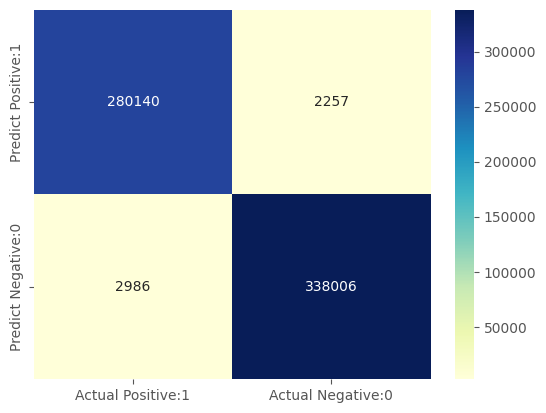

In [41]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [42]:
from sklearn.metrics import classification_report
print(classification_report(y_valid, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99    282397
           1       0.99      0.99      0.99    340992

    accuracy                           0.99    623389
   macro avg       0.99      0.99      0.99    623389
weighted avg       0.99      0.99      0.99    623389



In [43]:
from sklearn.metrics import matthews_corrcoef

# Assuming you have:
# - y_true: True labels
# - y_pred: Predicted labels

mcc = matthews_corrcoef(y_valid, y_pred)
print("MCC:", mcc)

MCC: 0.98303560456719


# submission

In [44]:
y_pred_test = clf.predict(imputed_encoded_df_test)

In [45]:
sub = pd.DataFrame({
    'id': test['id'],
    'class': y_pred_test
})

In [46]:
sub

,id,class
0,3116945,0
1,3116946,1
2,3116947,1
3,3116948,1
4,3116949,0
...,...,...
2077959,5194904,1
2077960,5194905,1
2077961,5194906,1
2077962,5194907,0


In [47]:
sub['class'] = sub['class'].replace( [0, 1],['e', 'p'])

In [48]:
sub

,id,class
0,3116945,e
1,3116946,p
2,3116947,p
3,3116948,p
4,3116949,e
...,...,...
2077959,5194904,p
2077960,5194905,p
2077961,5194906,p
2077962,5194907,e


In [49]:
sub.to_csv('submission.csv', index=False)